In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np 
import rnanorm
import gffutils


In [3]:
arabi_gene_names = pd.read_csv('/Users/michael/Data/Reference_data/Arabdidopsis_empty_reads_per_gene.csv', index_col = 'Gene Name')
arabi_gene_names

""
Gene Name
AT1G01010
AT1G01020
AT1G03987
AT1G01030
AT1G01040
...
ArthCt118
ArthCp083
ArthCt111


In [4]:
plate_data_location = '/Users/michael/Data/Luke_terrace_experiment'
plate_list = ['Plate1', 'Plate2', 'Plate3', 'Plate4']
quality_meta_data = pd.DataFrame(columns = ['Unmapped','Multimapping','No Feature','Ambiguous Unstranded', 'Ambiguous Forward'])
expression_data = arabi_gene_names



In [5]:

def Luke_file_parser(file_name, quality_dataframe, df_with_gene_names,data_directory = '/Users/michael/Data',):
    file_clean = file_name.split('.')[0]
    sample_incl_quality = pd.read_csv(f'{data_directory}/{file_name}', sep = '\t', names = ['Gene Name','Unstranded','Forward','Reverse'])
    quality_data = sample_incl_quality['Unstranded'][0:4].to_list()
    quality_data.append(sample_incl_quality['Forward'][3].item())
    sample_read_quality_meta_data = pd.DataFrame(columns = ['Unmapped','Multimapping','No Feature','Ambiguous Unstranded', 'Ambiguous Forward'], data = [quality_data], index = [file_clean])
    quality_dataframe = pd.concat([quality_dataframe, sample_read_quality_meta_data])
    cleaned_sample_data = pd.read_csv(f'{data_directory}/{file_name}', sep = '\t', names = ['Gene Name','Unstranded','Forward','Reverse'], skiprows = 4)
    df_with_gene_names[file_clean] = cleaned_sample_data['Forward'].to_list()
    return quality_dataframe, df_with_gene_names

In [6]:
for plate in plate_list:
    list_of_files = os.listdir(f'{plate_data_location}/{plate}')
    for file in list_of_files:
        quality_meta_data, expression_data = Luke_file_parser(file, quality_meta_data, expression_data, data_directory = f'{plate_data_location}/{plate}')

/var/folders/nk/6xkk9sgn1pz4ff1b36sfq3y40000gt/T/ipykernel_16112/4044277033.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_with_gene_names[file_clean] = cleaned_sample_data['Forward'].to_list()
/var/folders/nk/6xkk9sgn1pz4ff1b36sfq3y40000gt/T/ipykernel_16112/4044277033.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_with_gene_names[file_clean] = cleaned_sample_data['Forward'].to_list()
/var/folders/nk/6xkk9sgn1pz4ff1b36sfq3y40000gt/T/ipykernel_16112/4044277033.py:9: PerformanceWarning: DataFrame is highly fragment

In [7]:
quality_meta_data

,Unmapped,Multimapping,No Feature,Ambiguous Unstranded,Ambiguous Forward
A2450525897_n01_LICRNA01_H06,4328244,499905,321262,442619,51564
A2450525897_n01_LICRNA01_F06,4579055,780856,331588,745568,79267
A2450525897_n01_LICRNA01_E01,3004324,309156,135512,229101,26474
A2450525897_n01_LICRNA01_H10,2291624,408948,159867,259492,34365
A2450525897_n01_LICRNA01_F10,1988907,313884,161241,268582,33331
...,...,...,...,...,...
B2449500127_n01_LICRNA04_H11,407181,284510,34749,79403,9453
B2449500127_n01_LICRNA04_F10,1447741,338034,176272,192430,29762
B2449500127_n01_LICRNA04_C01,940988,235974,106360,133514,20182
B2449500127_n01_LICRNA04_D12,3683779,669927,579120,634455,94073


In [28]:
expression_data = expression_data.T


In [9]:
expression_data = expression_data.rename_axis(None, axis=1)
expression_data

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
A2450525897_n01_LICRNA01_H06,0,48,0,34,111,0,0,343,0,198,...,5,53,1,29,0,0,30,0,0,6
A2450525897_n01_LICRNA01_F06,12,87,0,55,150,0,0,331,0,212,...,3,82,5,18,0,0,3,0,0,12
A2450525897_n01_LICRNA01_E01,19,27,0,22,41,0,0,135,0,89,...,0,44,0,0,0,0,3,0,0,5
A2450525897_n01_LICRNA01_H10,6,24,0,5,97,0,0,140,0,75,...,0,32,0,2,0,0,8,0,0,0
A2450525897_n01_LICRNA01_F10,6,42,0,6,85,0,0,215,0,69,...,0,15,0,9,0,0,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B2449500127_n01_LICRNA04_H11,6,22,0,1,31,0,0,37,0,45,...,0,17,0,1,0,0,1,0,0,2
B2449500127_n01_LICRNA04_F10,0,25,0,0,74,0,0,178,0,73,...,0,13,0,3,0,0,0,0,0,0
B2449500127_n01_LICRNA04_C01,0,20,0,15,64,0,0,99,0,4,...,0,7,0,5,0,0,1,0,0,20
B2449500127_n01_LICRNA04_D12,15,82,0,11,192,0,0,347,0,116,...,1,47,0,4,0,0,33,0,0,25


In [11]:
sample_guide = pd.read_csv('/Users/michael/Git/Outdoor_microbiome/Local_analysis/Plate1_guide.csv', sep = '\t')
sample_guide['filename'] = sample_guide['filename'].str.split('.').str[0]
sample_guide

,filename,plate.pos,arb.sort,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate
0,A2450525897_n01_LICRNA01_A01,A01,1,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
1,A2450525897_n01_LICRNA01_B01,B01,2,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
2,A2450525897_n01_LICRNA01_C01,C01,3,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
3,A2450525897_n01_LICRNA01_D01,D01,4,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
4,A2450525897_n01_LICRNA01_E01,E01,5,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01
...,...,...,...,...,...,...,...,...,...,...
379,B2449500127_n01_LICRNA04_D12,D12,92,LIC640,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04
380,B2449500127_n01_LICRNA04_E12,E12,93,LIC641,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04
381,B2449500127_n01_LICRNA04_F12,F12,94,LIC642,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04
382,B2449500127_n01_LICRNA04_G12,G12,95,LIC643,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04


In [36]:
full_meta_data = sample_guide.merge(quality_meta_data, left_on = 'filename', right_index = True)
full_meta_data["plate_row"] = full_meta_data['plate.pos'].str[0]
full_meta_data['plate_col'] = full_meta_data['plate.pos'].str[1:].astype(int)
total_reads_plate = expression_data.sum()
total_reads_plate.name = 'Total Reads'
full_meta_data= full_meta_data.merge(total_reads_plate, left_on = 'filename', right_index = True)

In [37]:
full_meta_data

,filename,plate.pos,arb.sort,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,Multimapping,No Feature,Ambiguous Unstranded,Ambiguous Forward,plate_row,plate_col,Total Reads
0,A2450525897_n01_LICRNA01_A01,A01,1,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2633048,334817,112554,202285,22008,A,1,2248661
1,A2450525897_n01_LICRNA01_B01,B01,2,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,5074184,776239,226718,494847,49830,B,1,5984566
2,A2450525897_n01_LICRNA01_C01,C01,3,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2283008,427910,97848,271449,28416,C,1,2936453
3,A2450525897_n01_LICRNA01_D01,D01,4,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,1263467,177674,49095,123691,13452,D,1,1359823
4,A2450525897_n01_LICRNA01_E01,E01,5,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,3004324,309156,135512,229101,26474,E,1,2680737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,B2449500127_n01_LICRNA04_D12,D12,92,LIC640,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04,3683779,669927,579120,634455,94073,D,12,7589546
380,B2449500127_n01_LICRNA04_E12,E12,93,LIC641,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04,1604732,307847,248710,254268,35462,E,12,2868917
381,B2449500127_n01_LICRNA04_F12,F12,94,LIC642,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04,2279211,470930,347737,313143,48361,F,12,3742922
382,B2449500127_n01_LICRNA04_G12,G12,95,LIC643,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04,3911417,679771,548059,571417,87280,G,12,6883938


In [46]:
full_meta_data = full_meta_data.replace(0, np.nan)
full_meta_data ['Unmapped Over Mapped'] = full_meta_data['Unmapped'] / full_meta_data['Total Reads']

/var/folders/nk/6xkk9sgn1pz4ff1b36sfq3y40000gt/T/ipykernel_16112/2279282038.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_meta_data = full_meta_data.replace(0, np.nan)


In [47]:
full_meta_data

,filename,plate.pos,arb.sort,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,Multimapping,No Feature,Ambiguous Unstranded,Ambiguous Forward,plate_row,plate_col,Total Reads,Unmapped Over Mapped
0,A2450525897_n01_LICRNA01_A01,A01,1,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2633048.0,334817.0,112554.0,202285.0,22008.0,A,1,2248661.0,1.170940
1,A2450525897_n01_LICRNA01_B01,B01,2,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,5074184.0,776239.0,226718.0,494847.0,49830.0,B,1,5984566.0,0.847878
2,A2450525897_n01_LICRNA01_C01,C01,3,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2283008.0,427910.0,97848.0,271449.0,28416.0,C,1,2936453.0,0.777471
3,A2450525897_n01_LICRNA01_D01,D01,4,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,1263467.0,177674.0,49095.0,123691.0,13452.0,D,1,1359823.0,0.929141
4,A2450525897_n01_LICRNA01_E01,E01,5,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,3004324.0,309156.0,135512.0,229101.0,26474.0,E,1,2680737.0,1.120708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,B2449500127_n01_LICRNA04_D12,D12,92,LIC640,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04,3683779.0,669927.0,579120.0,634455.0,94073.0,D,12,7589546.0,0.485375
380,B2449500127_n01_LICRNA04_E12,E12,93,LIC641,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04,1604732.0,307847.0,248710.0,254268.0,35462.0,E,12,2868917.0,0.559351
381,B2449500127_n01_LICRNA04_F12,F12,94,LIC642,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04,2279211.0,470930.0,347737.0,313143.0,48361.0,F,12,3742922.0,0.608939
382,B2449500127_n01_LICRNA04_G12,G12,95,LIC643,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04,3911417.0,679771.0,548059.0,571417.0,87280.0,G,12,6883938.0,0.568195


In [49]:
full_meta_data.to_csv('/Users/michael/Git/Outdoor_microbiome/Local_analysis/Plates_1_to_4_metadata.csv', index = False)

In [39]:
meta_data_heatmap_format_plate_3 = full_meta_data.loc[full_meta_data['rnaprepplate']=='LICRNA_03'].pivot(index = 'plate_row', columns = 'plate_col', values = 'Total Reads')
meta_data_heatmap_format_plate_3

plate_col,1,2,3,4,5,6,7,8,9,10,11,12
plate_row,,,,,,,,,,,,
A,4702045,3426209,4993417,7992730,1966537,2110494,11274815,35127,999244,11486889,7080205,8111911
B,5527036,5844548,1227640,8735665,6397701,7028856,6850856,8760584,4984632,8262573,5975492,1930400
C,6866480,8956360,24284117,4521223,7034134,7972493,6864049,12527244,6276767,4271077,22087076,3624627
D,4740120,10611875,13887059,7492987,5076681,3966065,2158116,12372642,19089014,1827340,14457644,6660622
E,8146575,6880786,1467003,5576195,6382330,5222244,4353030,6279051,5527206,12524876,2408154,6665972
F,5171208,8294003,8399773,7678391,4326439,5265097,10160371,4262375,10341989,6317980,2197530,1278970
G,8957746,4254416,3627980,2732871,4860915,4603168,2021741,7872114,3523197,9619746,6315886,4191023
H,9338754,717003,4705779,6250771,1647357,4494472,4134513,5245242,7715482,643786,1509679,5444101


Text(83.22222222222221, 0.5, 'Plate Row')

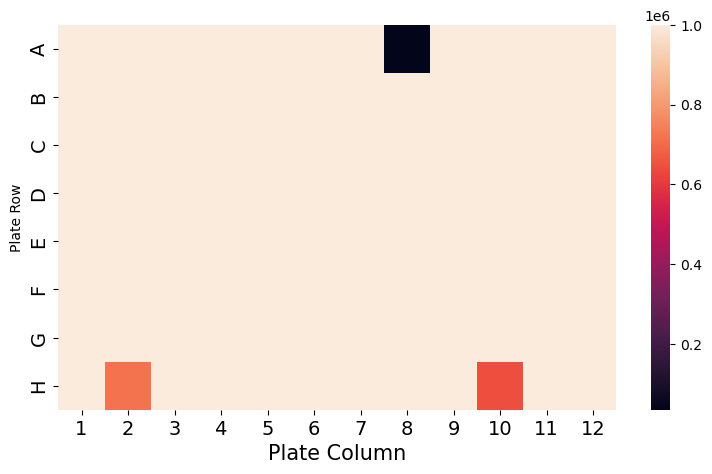

In [40]:

fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(meta_data_heatmap_format_plate_3.astype(float), vmax = 1_000_000)
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)
plt.xlabel('Plate Column', fontsize = 15)
plt.ylabel('Plate Row')

Text(83.22222222222221, 0.5, 'Plate Row')

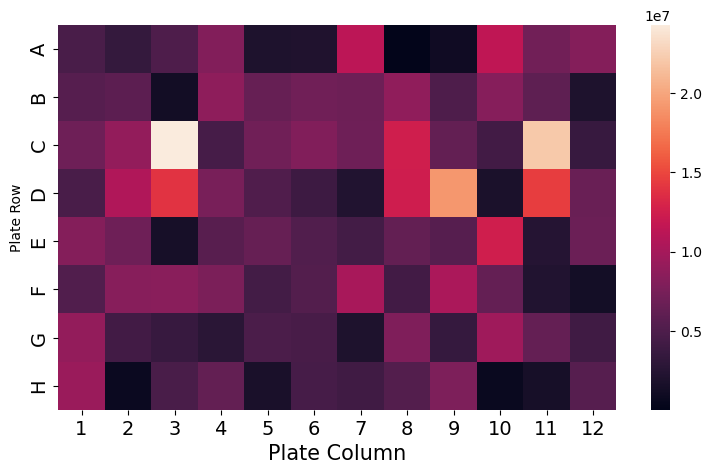

In [41]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(meta_data_heatmap_format_plate_3.astype(float),)
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)
plt.xlabel('Plate Column', fontsize = 15)
plt.ylabel('Plate Row')

In [42]:
meta_data_heatmap_format_plate_4 = full_meta_data.loc[full_meta_data['rnaprepplate']=='LICRNA_04'].pivot(index = 'plate_row', columns = 'plate_col', values = 'Total Reads')


Text(83.22222222222221, 0.5, 'Plate Row')

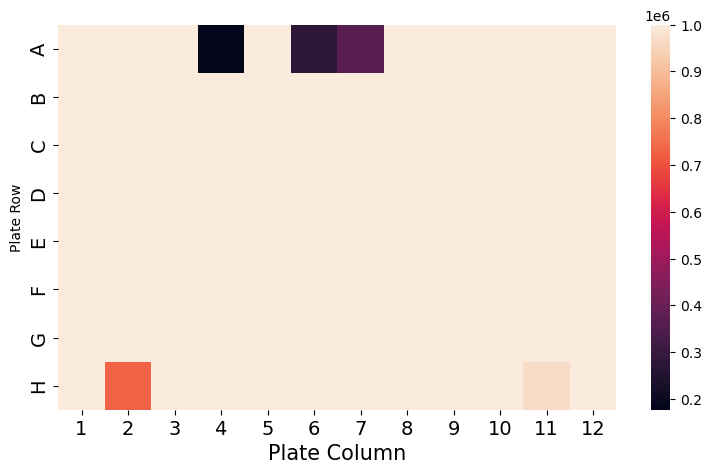

In [43]:

fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(meta_data_heatmap_format_plate_4.astype(float), vmax = 1_000_000)
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)
plt.xlabel('Plate Column', fontsize = 15)
plt.ylabel('Plate Row')

Text(83.22222222222221, 0.5, 'Plate Row')

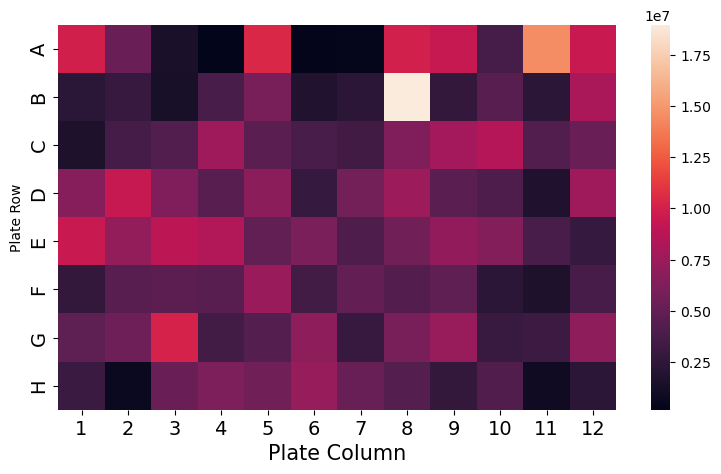

In [44]:

fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(meta_data_heatmap_format_plate_4.astype(float),)
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)
plt.xlabel('Plate Column', fontsize = 15)
plt.ylabel('Plate Row')

In [48]:
full_meta_data

,filename,plate.pos,arb.sort,sampID,sample.type,timepoint,date,time,extractplate,rnaprepplate,Unmapped,Multimapping,No Feature,Ambiguous Unstranded,Ambiguous Forward,plate_row,plate_col,Total Reads,Unmapped Over Mapped
0,A2450525897_n01_LICRNA01_A01,A01,1,LIC001,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2633048.0,334817.0,112554.0,202285.0,22008.0,A,1,2248661.0,1.170940
1,A2450525897_n01_LICRNA01_B01,B01,2,LIC002,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,5074184.0,776239.0,226718.0,494847.0,49830.0,B,1,5984566.0,0.847878
2,A2450525897_n01_LICRNA01_C01,C01,3,LIC003,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,2283008.0,427910.0,97848.0,271449.0,28416.0,C,1,2936453.0,0.777471
3,A2450525897_n01_LICRNA01_D01,D01,4,LIC004,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,1263467.0,177674.0,49095.0,123691.0,13452.0,D,1,1359823.0,0.929141
4,A2450525897_n01_LICRNA01_E01,E01,5,LIC005,plant,t01,11/1/23,8:00,LIC_01,LICRNA_01,3004324.0,309156.0,135512.0,229101.0,26474.0,E,1,2680737.0,1.120708
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,B2449500127_n01_LICRNA04_D12,D12,92,LIC640,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04,3683779.0,669927.0,579120.0,634455.0,94073.0,D,12,7589546.0,0.485375
380,B2449500127_n01_LICRNA04_E12,E12,93,LIC641,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04,1604732.0,307847.0,248710.0,254268.0,35462.0,E,12,2868917.0,0.559351
381,B2449500127_n01_LICRNA04_F12,F12,94,LIC642,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04,2279211.0,470930.0,347737.0,313143.0,48361.0,F,12,3742922.0,0.608939
382,B2449500127_n01_LICRNA04_G12,G12,95,LIC643,plant,c2_t06,3/2/24,16:00,LICCIRC_03,LICRNA_04,3911417.0,679771.0,548059.0,571417.0,87280.0,G,12,6883938.0,0.568195


Text(83.22222222222221, 0.5, 'Plate Row')

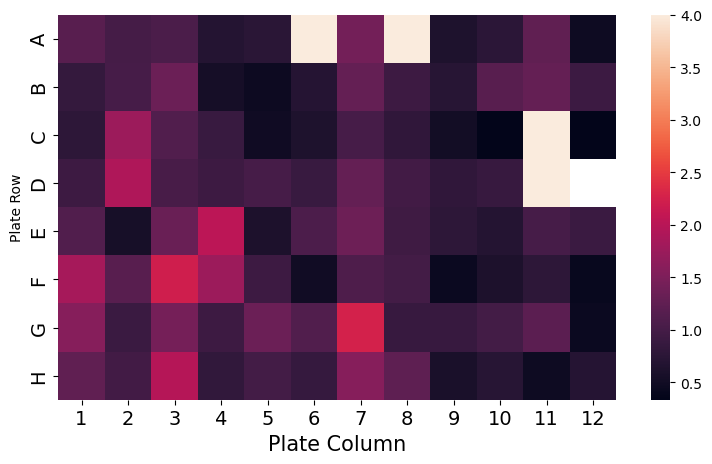

In [54]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(full_meta_data.loc[full_meta_data['rnaprepplate']=='LICRNA_01'].pivot(index = 'plate_row', columns = 'plate_col', values = 'Unmapped Over Mapped').astype(float), vmax = 4)
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)
plt.xlabel('Plate Column', fontsize = 15)
plt.ylabel('Plate Row')

Text(83.22222222222221, 0.5, 'Plate Row')

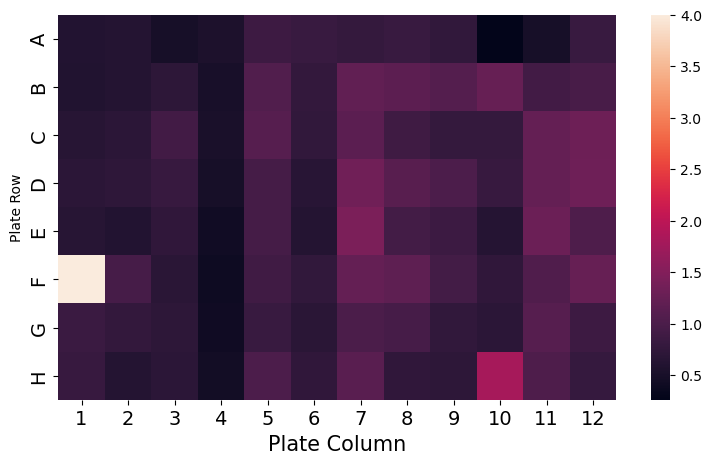

In [56]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(full_meta_data.loc[full_meta_data['rnaprepplate']=='LICRNA_02'].pivot(index = 'plate_row', columns = 'plate_col', values = 'Unmapped Over Mapped').astype(float), vmax = 4)
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)
plt.xlabel('Plate Column', fontsize = 15)
plt.ylabel('Plate Row')

Text(83.22222222222221, 0.5, 'Plate Row')

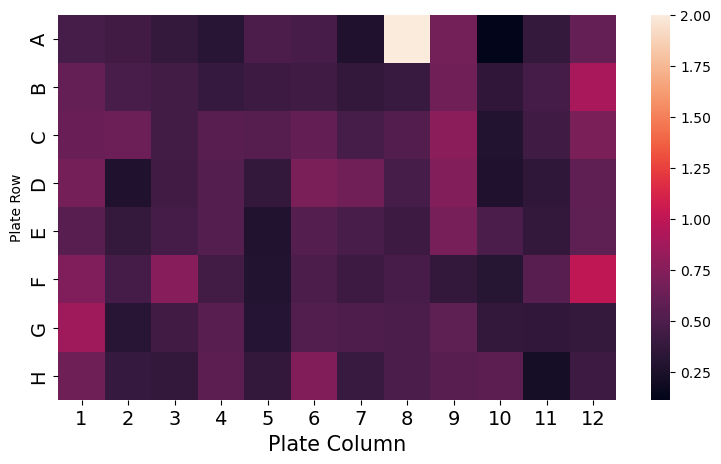

In [51]:

fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(full_meta_data.loc[full_meta_data['rnaprepplate']=='LICRNA_03'].pivot(index = 'plate_row', columns = 'plate_col', values = 'Unmapped Over Mapped').astype(float),vmax = 2)
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)
plt.xlabel('Plate Column', fontsize = 15)
plt.ylabel('Plate Row')

Text(83.22222222222221, 0.5, 'Plate Row')

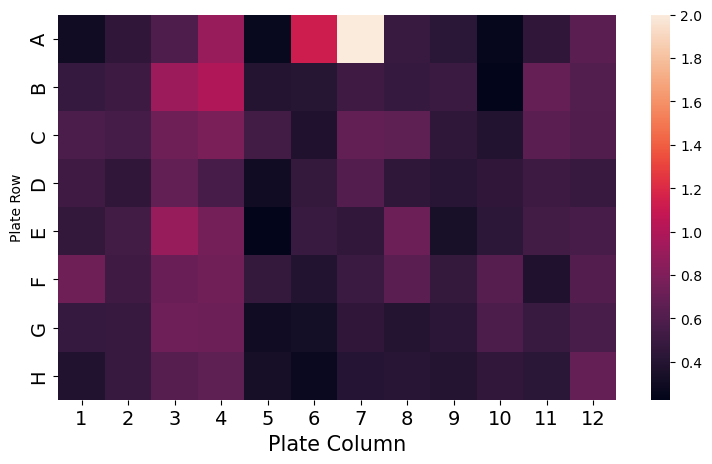

In [57]:
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(full_meta_data.loc[full_meta_data['rnaprepplate']=='LICRNA_04'].pivot(index = 'plate_row', columns = 'plate_col', values = 'Unmapped Over Mapped').astype(float),vmax = 2)
ax.tick_params(axis='x', labelsize = 14)
ax.tick_params(axis='y', labelsize = 14)
plt.xlabel('Plate Column', fontsize = 15)
plt.ylabel('Plate Row')

In [ ]:
#expression_data.to_csv('/Users/michael/Data/Luke_terrace_experiment/General_data/plate1_4_for_norm.csv')

In [34]:
expression_data_trimmed = expression_data.iloc[:,0:5]

In [35]:
expression_data_trimmed = expression_data_trimmed.reset_index(drop = True)
expression_data_trimmed = expression_data_trimmed.iloc[0:3,:]
expression_data_trimmed

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040
0,0,48,0,34,111
1,12,87,0,55,150
2,19,27,0,22,41


In [49]:
tpm = rnanorm.TPM(gtf = '/Users/michael/Data/Genomes/Arabidopsis_thaliana/dupe_removed_normal.gtf').set_output(transform = 'pandas')

In [45]:
db = gffutils.create_db('/Users/michael/Data/Genomes/Arabidopsis_thaliana/arabidopsis.gtf', '/Users/michael/Data/Genomes/Arabidopsis_thaliana/arabidopsis_gtf_database_merge.db', disable_infer_genes= True, disable_infer_transcripts= True, merge_strategy = 'merge')

In [46]:
db = gffutils.FeatureDB('/Users/michael/Data/Genomes/Arabidopsis_thaliana/arabidopsis_gtf_database_merge.db')

In [47]:
with open('/Users/michael/Data/Genomes/Arabidopsis_thaliana/dupe_removed_normal.gtf', 'w') as fout:
    for f in db.all_features():
        fout.write(str(f) + '\n')

In [ ]:
with open('/Users/michael/Data/Genomes/Arabidopsis_thaliana/dupe_removed_short.gtf', 'w') as fout:
    for exon in db.features_of_type('exon'):
        genes = [i.id for i in  db.parents(exon, featuretype='gene')]
        exon.attributes['gene_id'] = genes
        exon.attributes['length'] = str(len(exon))
        fout.write(str(exon) + '\n')

TypeError: TextIOWrapper.write() takes exactly one argument (2 given)

In [41]:
db['AT1G01010']

<Feature gene (NC_003070.9:3631-5899[+]) at 0x18cf74500>

In [44]:
[f.id for f in db.children('AT1G01010', featuretype='exon')]


['exon_1', 'exon_2', 'exon_3', 'exon_4', 'exon_5', 'exon_6']

In [51]:
expression_data

,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
A2450525897_n01_LICRNA01_H06,0,48,0,34,111,0,0,343,0,198,...,5,53,1,29,0,0,30,0,0,6
A2450525897_n01_LICRNA01_F06,12,87,0,55,150,0,0,331,0,212,...,3,82,5,18,0,0,3,0,0,12
A2450525897_n01_LICRNA01_E01,19,27,0,22,41,0,0,135,0,89,...,0,44,0,0,0,0,3,0,0,5
A2450525897_n01_LICRNA01_H10,6,24,0,5,97,0,0,140,0,75,...,0,32,0,2,0,0,8,0,0,0
A2450525897_n01_LICRNA01_F10,6,42,0,6,85,0,0,215,0,69,...,0,15,0,9,0,0,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B2449500127_n01_LICRNA04_H11,6,22,0,1,31,0,0,37,0,45,...,0,17,0,1,0,0,1,0,0,2
B2449500127_n01_LICRNA04_F10,0,25,0,0,74,0,0,178,0,73,...,0,13,0,3,0,0,0,0,0,0
B2449500127_n01_LICRNA04_C01,0,20,0,15,64,0,0,99,0,4,...,0,7,0,5,0,0,1,0,0,20
B2449500127_n01_LICRNA04_D12,15,82,0,11,192,0,0,347,0,116,...,1,47,0,4,0,0,33,0,0,25


In [50]:
tpm_normalized_expression = tpm.fit_transform(expression_data)
tpm_normalized_expression

/Users/michael/miniconda3/envs/rna-norm/lib/python3.12/site-packages/rnanorm/methods/within_sample.py:135: UserWarning: X contains 8 genes that are not in GTF /Users/michael/Data/Genomes/Arabidopsis_thaliana/dupe_removed_normal.gtf. This will result in NaN values for missing genes in the output.
  warnings.warn(
/Users/michael/miniconda3/envs/rna-norm/lib/python3.12/site-packages/rnanorm/methods/within_sample.py:66: RuntimeWarning: invalid value encountered in divide
  return X / lib_size[:, np.newaxis] * 1e6


,AT1G01010,AT1G01020,AT1G03987,AT1G01030,AT1G01040,AT1G03993,AT1G01046,AT1G01050,AT1G03997,AT1G01060,...,ArthCt124,ArthCr088,ArthCt112,ArthCp088,ArthCp086,ArthCt118,ArthCp083,ArthCt111,ArthCp084,ArthCp085
A2450525897_n01_LICRNA01_H06,0.000000,4.710994,0.0,2.751892,2.725712,0.0,0.0,45.395800,0.0,8.924001,...,10.707424,5.480822,2.141485,9.554317,0.0,0.0,0.671838,0.0,0.0,1.121359
A2450525897_n01_LICRNA01_F06,0.708270,5.517386,0.0,2.876458,2.380077,0.0,0.0,28.306904,0.0,6.174092,...,4.151252,5.479318,6.918753,3.831925,0.0,0.0,0.043412,0.0,0.0,1.449164
A2450525897_n01_LICRNA01_E01,3.690795,5.635420,0.0,3.786748,2.141076,0.0,0.0,37.996762,0.0,8.530523,...,0.000000,9.676399,0.000000,0.000000,0.0,0.0,0.142875,0.0,0.0,1.987260
A2450525897_n01_LICRNA01_H10,0.925562,3.977974,0.0,0.683442,4.022612,0.0,0.0,31.291687,0.0,5.708672,...,0.000000,5.588551,0.000000,1.112784,0.0,0.0,0.302561,0.0,0.0,0.000000
A2450525897_n01_LICRNA01_F10,0.894939,6.731127,0.0,0.792996,3.408341,0.0,0.0,46.465133,0.0,5.078210,...,0.000000,2.532960,0.000000,4.841850,0.0,0.0,0.146275,0.0,0.0,0.305183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B2449500127_n01_LICRNA04_H11,3.809142,15.007035,0.0,0.562540,5.290779,0.0,0.0,34.034878,0.0,14.096388,...,0.000000,12.218550,0.000000,2.289826,0.0,0.0,0.155648,0.0,0.0,2.597912
B2449500127_n01_LICRNA04_F10,0.000000,4.386463,0.0,0.000000,3.248567,0.0,0.0,42.115763,0.0,5.881937,...,0.000000,2.403346,0.000000,1.766957,0.0,0.0,0.000000,0.0,0.0,0.000000
B2449500127_n01_LICRNA04_C01,0.000000,5.973647,0.0,3.694724,4.782723,0.0,0.0,39.874480,0.0,0.548647,...,0.000000,2.202958,0.000000,5.013141,0.0,0.0,0.068153,0.0,0.0,11.375273
B2449500127_n01_LICRNA04_D12,0.918700,5.396255,0.0,0.596970,3.161299,0.0,0.0,30.793452,0.0,3.505579,...,1.435894,3.258930,0.000000,0.883627,0.0,0.0,0.495524,0.0,0.0,3.132859


In [52]:
tpm_normalized_expression.to_csv('/Users/michael/Data/Luke_terrace_experiment/General_data/plate1_4_tpm_normalized.csv')